In [1]:
import os, sys, glob
from matplotlib import pyplot as plt
import matplotlib.lines as mlines

plt.style.use('science')

sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/se2dr/se2wave/utils/python/")
sys.path.insert(0,"/home/nico/Documents/TEAR/Codes_TEAR/PythonCodes/LibFolder")

from Lib_GeneralFunctions import *
from Lib_ProfilePlotting import *
from Lib_ProfileProcessing import *
from Lib_SigmoidProcessing import *
from Lib_SpectrogramPlot import *
from Lib_GeneralSignalProcNAnalysis import *
from Lib_MatlabReader import *
from GeneratePaperFigs import LabelizeAxisList


import pandas as pd

In [2]:
def FormatLineLabels(Axis, LabelList, **kwargs):
    Lines = Axis.get_lines()
    legend2 = Axis.legend(Lines, LabelList , **kwargs)
    Axis.add_artist(legend2)

In [3]:
from palettable.cartocolors.qualitative import Safe_8_r as ElColor
cmap = ElColor.mpl_colors

from palettable.scientific.sequential import Nuuk_20 as ElColor
cmapCont = ElColor.mpl_colormap

In [4]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
FontSizeControlFreak(SMALL_SIZE,MEDIUM_SIZE,BIGGER_SIZE)

In [5]:
FolderPath = '/home/nico/LRZ Sync+Share/SharedWolfel/PaperData/ReceiverData/'
SpecificFolder = '20220207/'
Filename = 'Receivers_TEAR22_TPV3_T0_P3_025x025_A18phi65_Delta1.001_7s_21450_d25.025.pickle'
ListReceivers = LoadPickleFile(FolderPath+SpecificFolder, Filename)

ListReceivers

[SingleTimeProfile([0, 25.025]),
 SingleTimeProfile([2000, 25.025]),
 SingleTimeProfile([4000, 25.025]),
 SingleTimeProfile([6000, 25.025]),
 SingleTimeProfile([8000, 25.025]),
 SingleTimeProfile([0, 25]),
 SingleTimeProfile([2000, 25]),
 SingleTimeProfile([4000, 25]),
 SingleTimeProfile([6000, 25]),
 SingleTimeProfile([8000, 25]),
 SingleTimeProfile([0, 50]),
 SingleTimeProfile([2000, 50]),
 SingleTimeProfile([4000, 50]),
 SingleTimeProfile([6000, 50]),
 SingleTimeProfile([8000, 50]),
 SingleTimeProfile([0, 100]),
 SingleTimeProfile([2000, 100]),
 SingleTimeProfile([4000, 100]),
 SingleTimeProfile([6000, 100]),
 SingleTimeProfile([8000, 100]),
 SingleTimeProfile([0, 200]),
 SingleTimeProfile([2000, 200]),
 SingleTimeProfile([4000, 200]),
 SingleTimeProfile([6000, 200]),
 SingleTimeProfile([8000, 200]),
 SingleTimeProfile([0, 300]),
 SingleTimeProfile([2000, 300]),
 SingleTimeProfile([4000, 300]),
 SingleTimeProfile([6000, 300]),
 SingleTimeProfile([8000, 300]),
 SingleTimeProfile([0, 

# Reference

In [6]:
def PopulateReference(MatlabStruct,VelMatlabStruct,RecI):

    MyReceiver = SingleReceiver((MatlabStruct["x"][RecI][0],MatlabStruct["z"][RecI][0]))

    [MyReceiver.appendFieldValues(time=MatlabStruct["dt"]*TimeIdx, 
                                 dispx=MatlabStruct["Field_x"][TimeIdx][RecI], 
                                 dispy=MatlabStruct["Field_z"][TimeIdx][RecI],
                                 velx=VelMatlabStruct["Field_x"][TimeIdx][RecI],
                                 vely=VelMatlabStruct["Field_z"][TimeIdx][RecI]) 
     for TimeIdx in range(MatlabStruct["nt"])]
    
    return MyReceiver

def PlotReference(ListReferenceReceivers,ax,Gradient=True,RecColorIdx=[1,7]):
    ColIdx = 0
    for i in [0,7]: # Y location index
        ColIx = RecColorIdx[ColIdx]
        ColIdx += 1
        Ycoord = ListReferenceReceivers[i].Coord[1]
        Xcoord = ListReferenceReceivers[i].Coord[0]

        Time, Amplitude = SortReceiver(ListReferenceReceivers[i],ListReferenceReceivers[i].VelY)
        if (Gradient):
            Amplitude = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))

        print(ListReferenceReceivers[i].Coord)

        FreqSamp= 1/(Time[3]-Time[2])
        ax.magnitude_spectrum(Amplitude,FreqSamp,ls='--',color = cmap[ColIx])

MatlabStruct = ReadSEM2DPACKFieldStructure(FolderPath+"Reference/","UFieldStruct.mat")
VelMatlabStruct = ReadSEM2DPACKFieldStructure(FolderPath+"Reference/","VFieldStruct.mat")

ListReferenceReceivers = [PopulateReference(MatlabStruct, VelMatlabStruct, RecI) for RecI in range(int(MatlabStruct["nsta"]))]

In [7]:
def Format_ProfilePlot(Label, ax, ListReceivers, StationIDX, scaling, nstat):
    axT = ax.twinx()
    axT.set_ylim(ax.get_ylim())

    axT.set_ylabel(Label)

    ax.set_yticks([ListReceivers[StationIDX+5*j].Coord[1]/scaling for j in range(1,nstat)])
    ax.set_yticklabels([ListReceivers[StationIDX+5*j].Coord[1] for j in range(1,nstat)])
    ax.set_ylabel("$y$ [m]")
    ax.set_xlabel("time [s]")

def Format_PlotMagnitudeSpectra(ax):
    ax.set_yscale('log')
    ax.set_xscale('log')

    ax.set_ylim([0.00001,0.1])
    ax.set_ylabel("Amplitude spectrum")
    ax.set_xlabel("Frequency [Hz]")
    ax.legend(title='Receivers location', loc=3)
    
    
def AddStyleLegend(Axes):                        
    LinesContDisc = []
    LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "--",
                         linewidth = 1, label ="SEM2DPACK" ))
    LinesContDisc.append(mlines.Line2D([], [], color = "k", ls = "-",
                         linewidth = 1, label ="se2dr" ))
    
    legendContDisc = Axes.legend(LinesContDisc, ["SEM2DPACK","se2dr"],loc=6)
    Axes.add_artist(legendContDisc)

def GetLineReceiver2Legend(ax,ListReceivers,StationIDX,TextColor):
    RecLoc = ListReceivers[StationIDX].Coord
    LabelText = "Receiver at ({} m, {} m)".format(RecLoc[0],RecLoc[1])
    legendContDisc = ax.legend(ax.get_lines(), [LabelText],loc=4)
    plt.setp(legendContDisc.get_texts(), color=TextColor)
    ax.add_artist(legendContDisc)
    
    
def CustomTickX(ax,Label,Loc):
    dic = { Loc : Label}
    ticks = ax.get_xticks()
    
    ticks=np.append(ticks,Loc)

    xtl=ticks.tolist()
    xtl[-1]=Label
    ax.set_xticks(ticks)
    ax.set_xticklabels(xtl)

# Resolution Mark

It follows:

$G = \frac{p\lambda}{h}$, $\lambda = C_s/f_{max}$

Thus:

$f_{max}=\frac{p\ C_s}{G\ h}$

sem2dpack reference gives that the number of nodes per shortest wavelength should be larger than 5. 

Seriani and Priolo 1994 indicate that 

In [8]:
Cs=3464
G=10

f_se2dr = 3*Cs/(15*25)
f_sem2dpack = 6*Cs/(G*100)
print(f_se2dr,f_sem2dpack)

27.712 20.784


(2000, 25.0)
(2000, 500.0)
[2000, 25]
[2000, 500]


(0.1, 27.712)

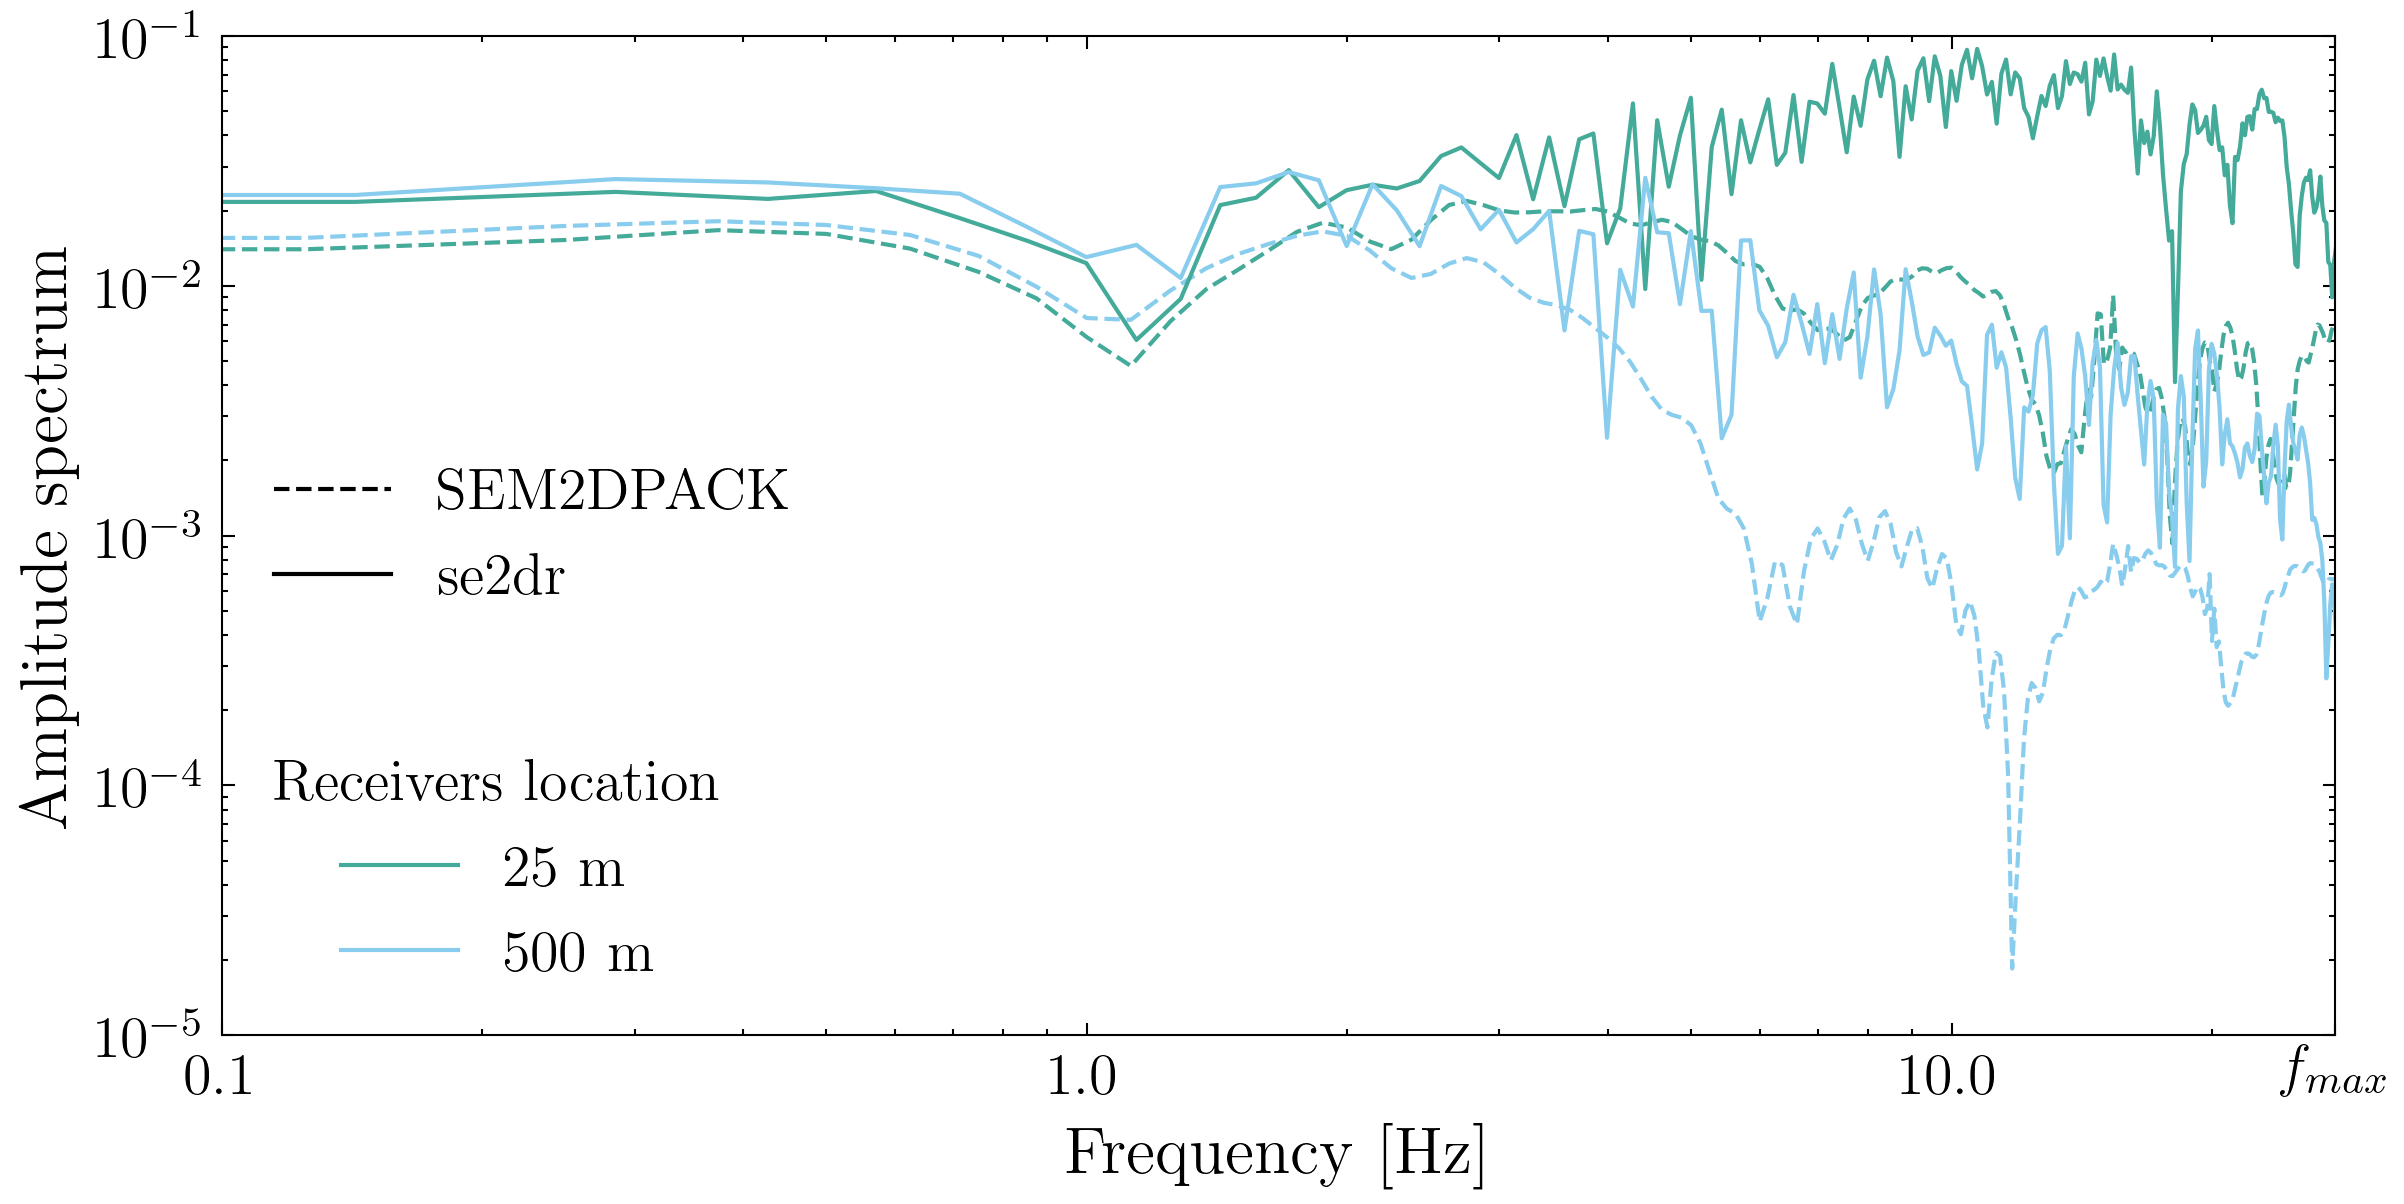

In [9]:

Xloc = 1 # X location index

fig = plt.figure(figsize = (8,4),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])


PlotReference(ListReferenceReceivers,ax)
for j in [1,7]: # Y location index
    Yloc = 5*j
    StationIDX = Xloc + Yloc

    i = StationIDX 
    Ycoord = ListReceivers[i].Coord[1]
    Xcoord = ListReceivers[i].Coord[0]

    Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)
    AmplitudeGrad = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))


    print(ListReceivers[i].Coord)

    FreqSamp= 1/(Time[3]-Time[2])
    ax.magnitude_spectrum(AmplitudeGrad,FreqSamp,label='{} m'.format(Ycoord),color=cmap[j])
    
    
AddStyleLegend(ax)
Format_PlotMagnitudeSpectra(ax)

CustomTickX(ax,"$f_{max}$", f_se2dr)
plt.xlim([1e-1,f_se2dr])


[0, 25]
[2000, 25]
[4000, 25]
[6000, 25]
[8000, 25]


(0.1, 27.712)

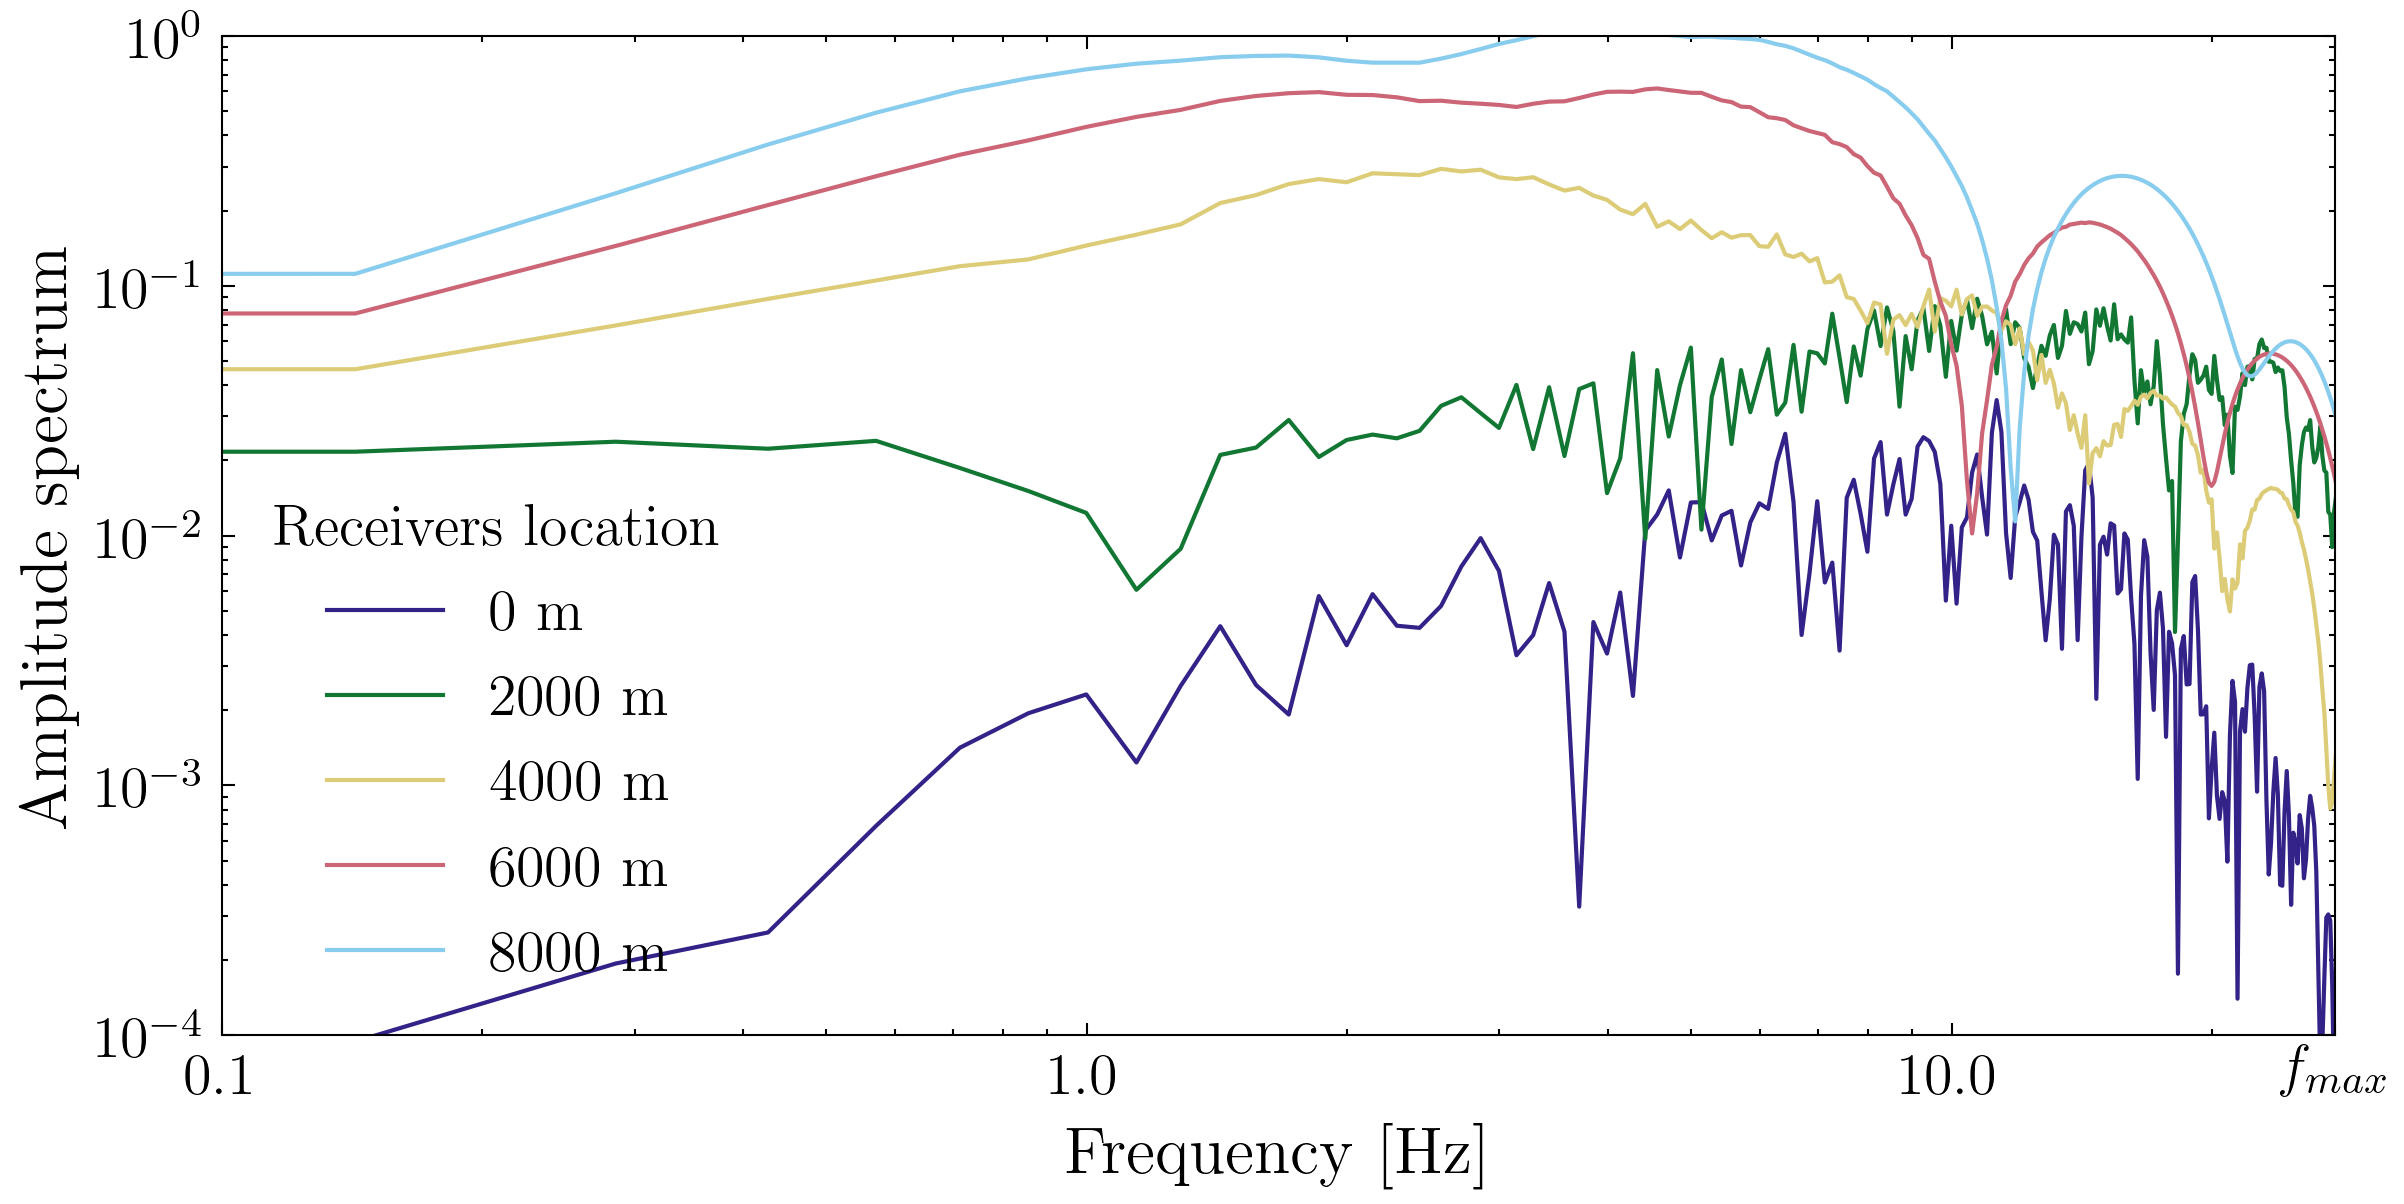

In [10]:
from palettable.cartocolors.qualitative import Safe_5_r as ElColor
cmap2 = ElColor.mpl_colors


fig = plt.figure(figsize = (8,4),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])

Xloc = [0,1,2,3,4]

spectra = []
frequency = []
for xidx in Xloc:

    ColIdx = 0
    for j in [1]: # Y location index
        ColIdx += 1
        Yloc = 5*j
        StationIDX = xidx + Yloc
        

        i = StationIDX 
        Ycoord = ListReceivers[i].Coord[1]
        Xcoord = ListReceivers[i].Coord[0]

        Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)
        AmplitudeGrad = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))


        print(ListReceivers[i].Coord)

        FreqSamp= 1/(Time[3]-Time[2])
        spec, freq, line = plt.magnitude_spectrum(AmplitudeGrad,FreqSamp,label='{} m'.format(Xcoord),color=cmap2[xidx])
        
        spectra.append(spec)
        frequency.append(freq)


plt.yscale("log")
plt.xscale("log")
#AddStyleLegend(ax)
Format_PlotMagnitudeSpectra(ax)
plt.ylim([1e-4,1e0])

CustomTickX(ax,"$f_{max}$", f_se2dr)
plt.xlim([1e-1,f_se2dr])


(0.1, 27.712)

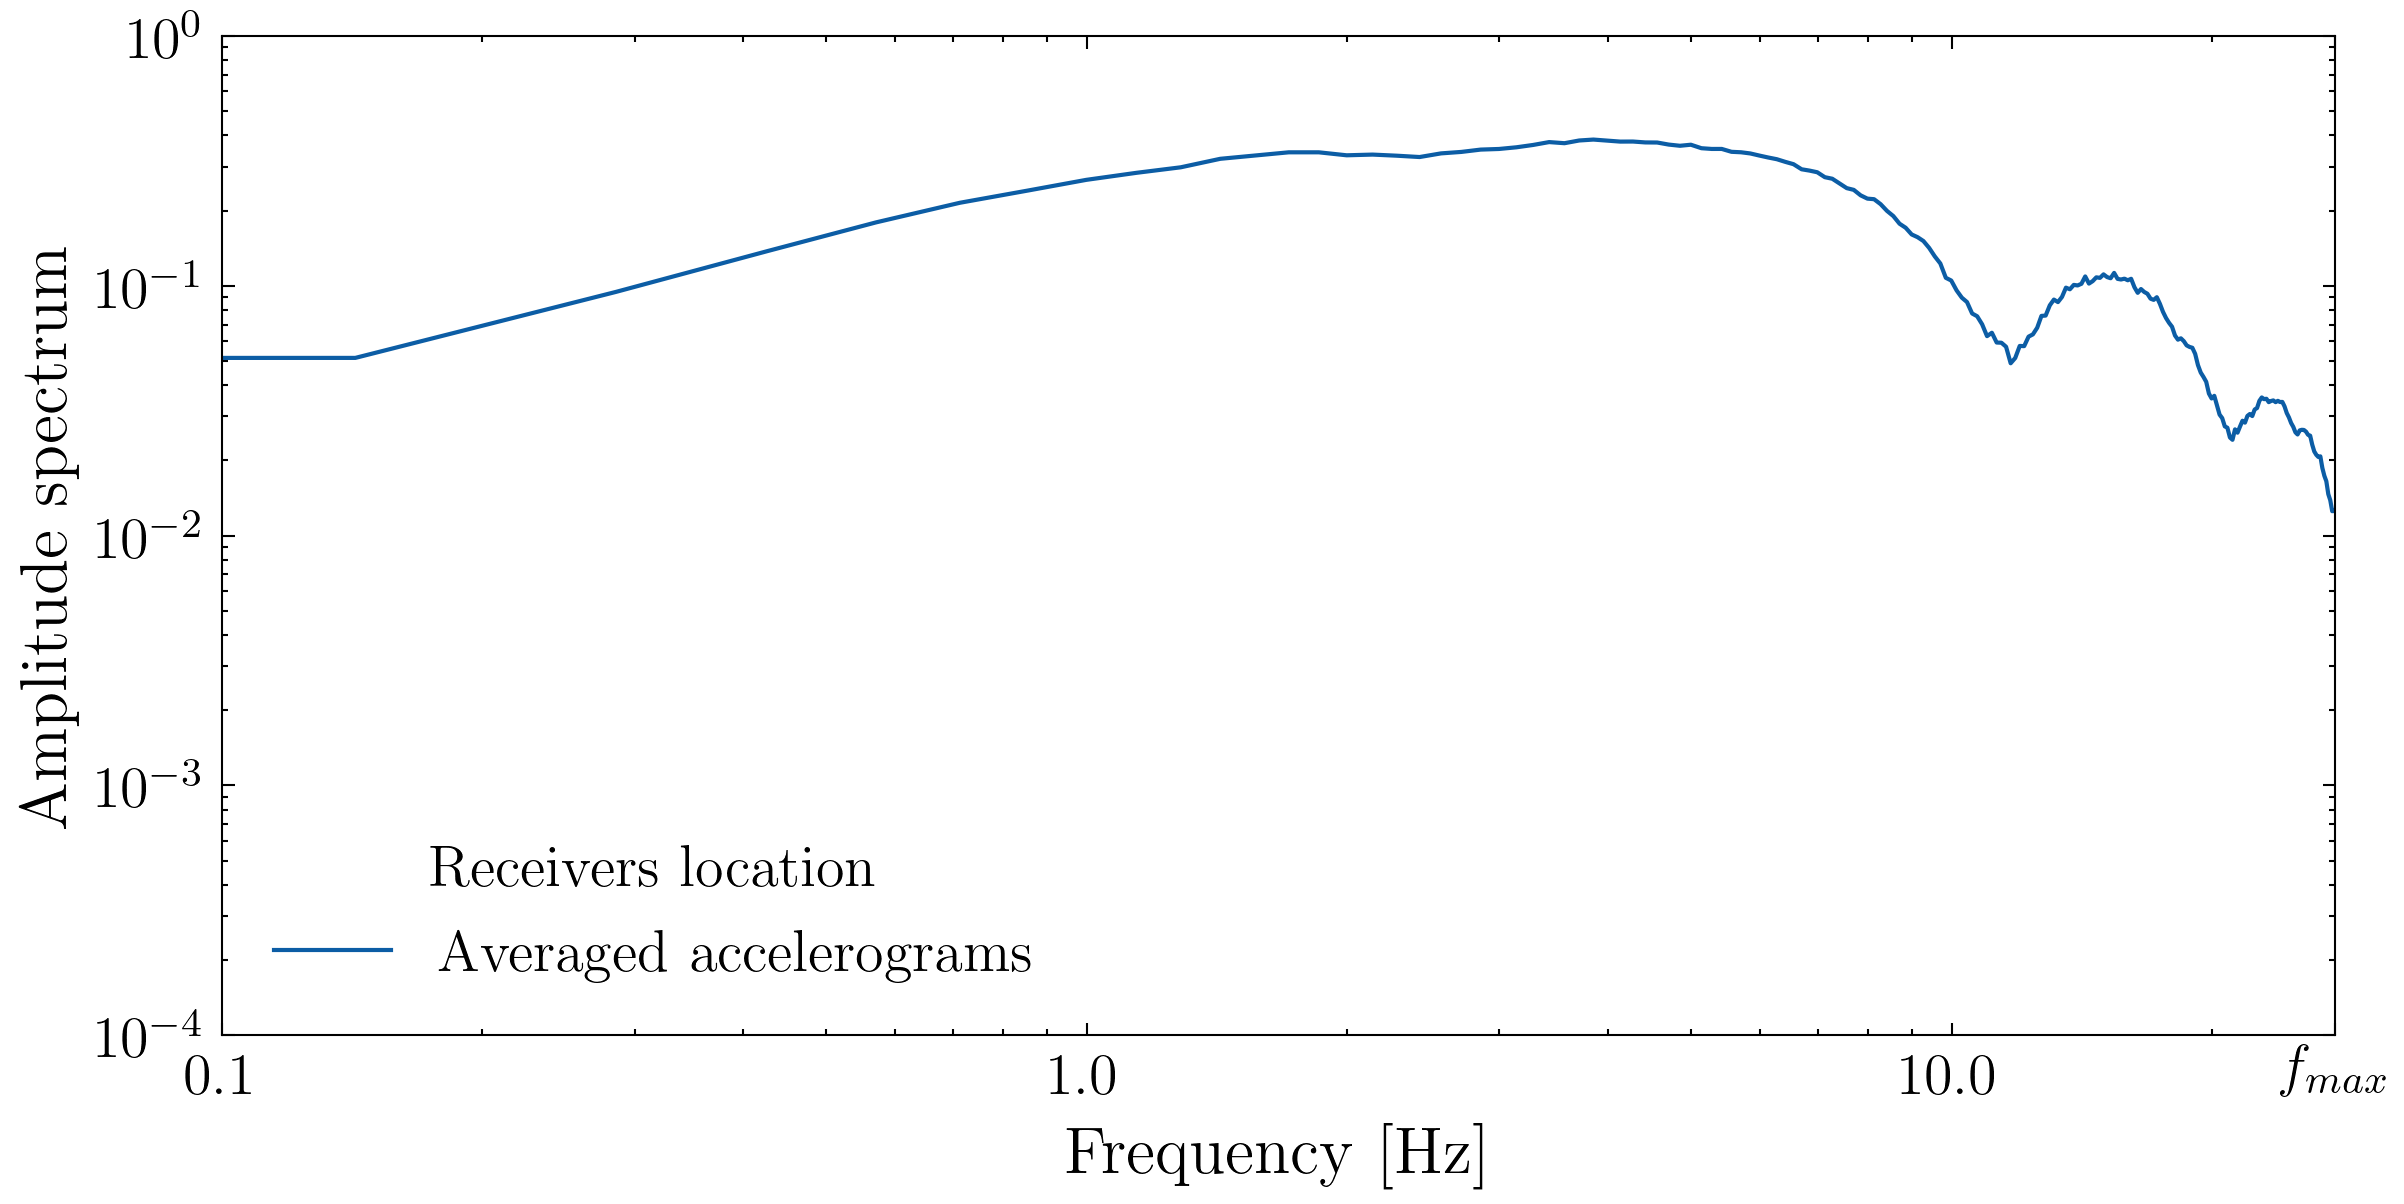

In [11]:
fig = plt.figure(figsize = (8,4),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])


MaxiSpectra = spectra[0]+spectra[1]+spectra[2]+spectra[3]+spectra[4]

AvgSpectra = MaxiSpectra/5
plt.plot(freq,AvgSpectra,label='Averaged accelerograms')

plt.yscale("log")
plt.xscale("log")
Format_PlotMagnitudeSpectra(ax)
plt.ylim([1e-4,1e0])


CustomTickX(ax,"$f_{max}$", f_se2dr)
plt.xlim([1e-1,f_se2dr])


[0, 25]
[2000, 25]
[4000, 25]
[6000, 25]
[8000, 25]


(0.1, 27.712)

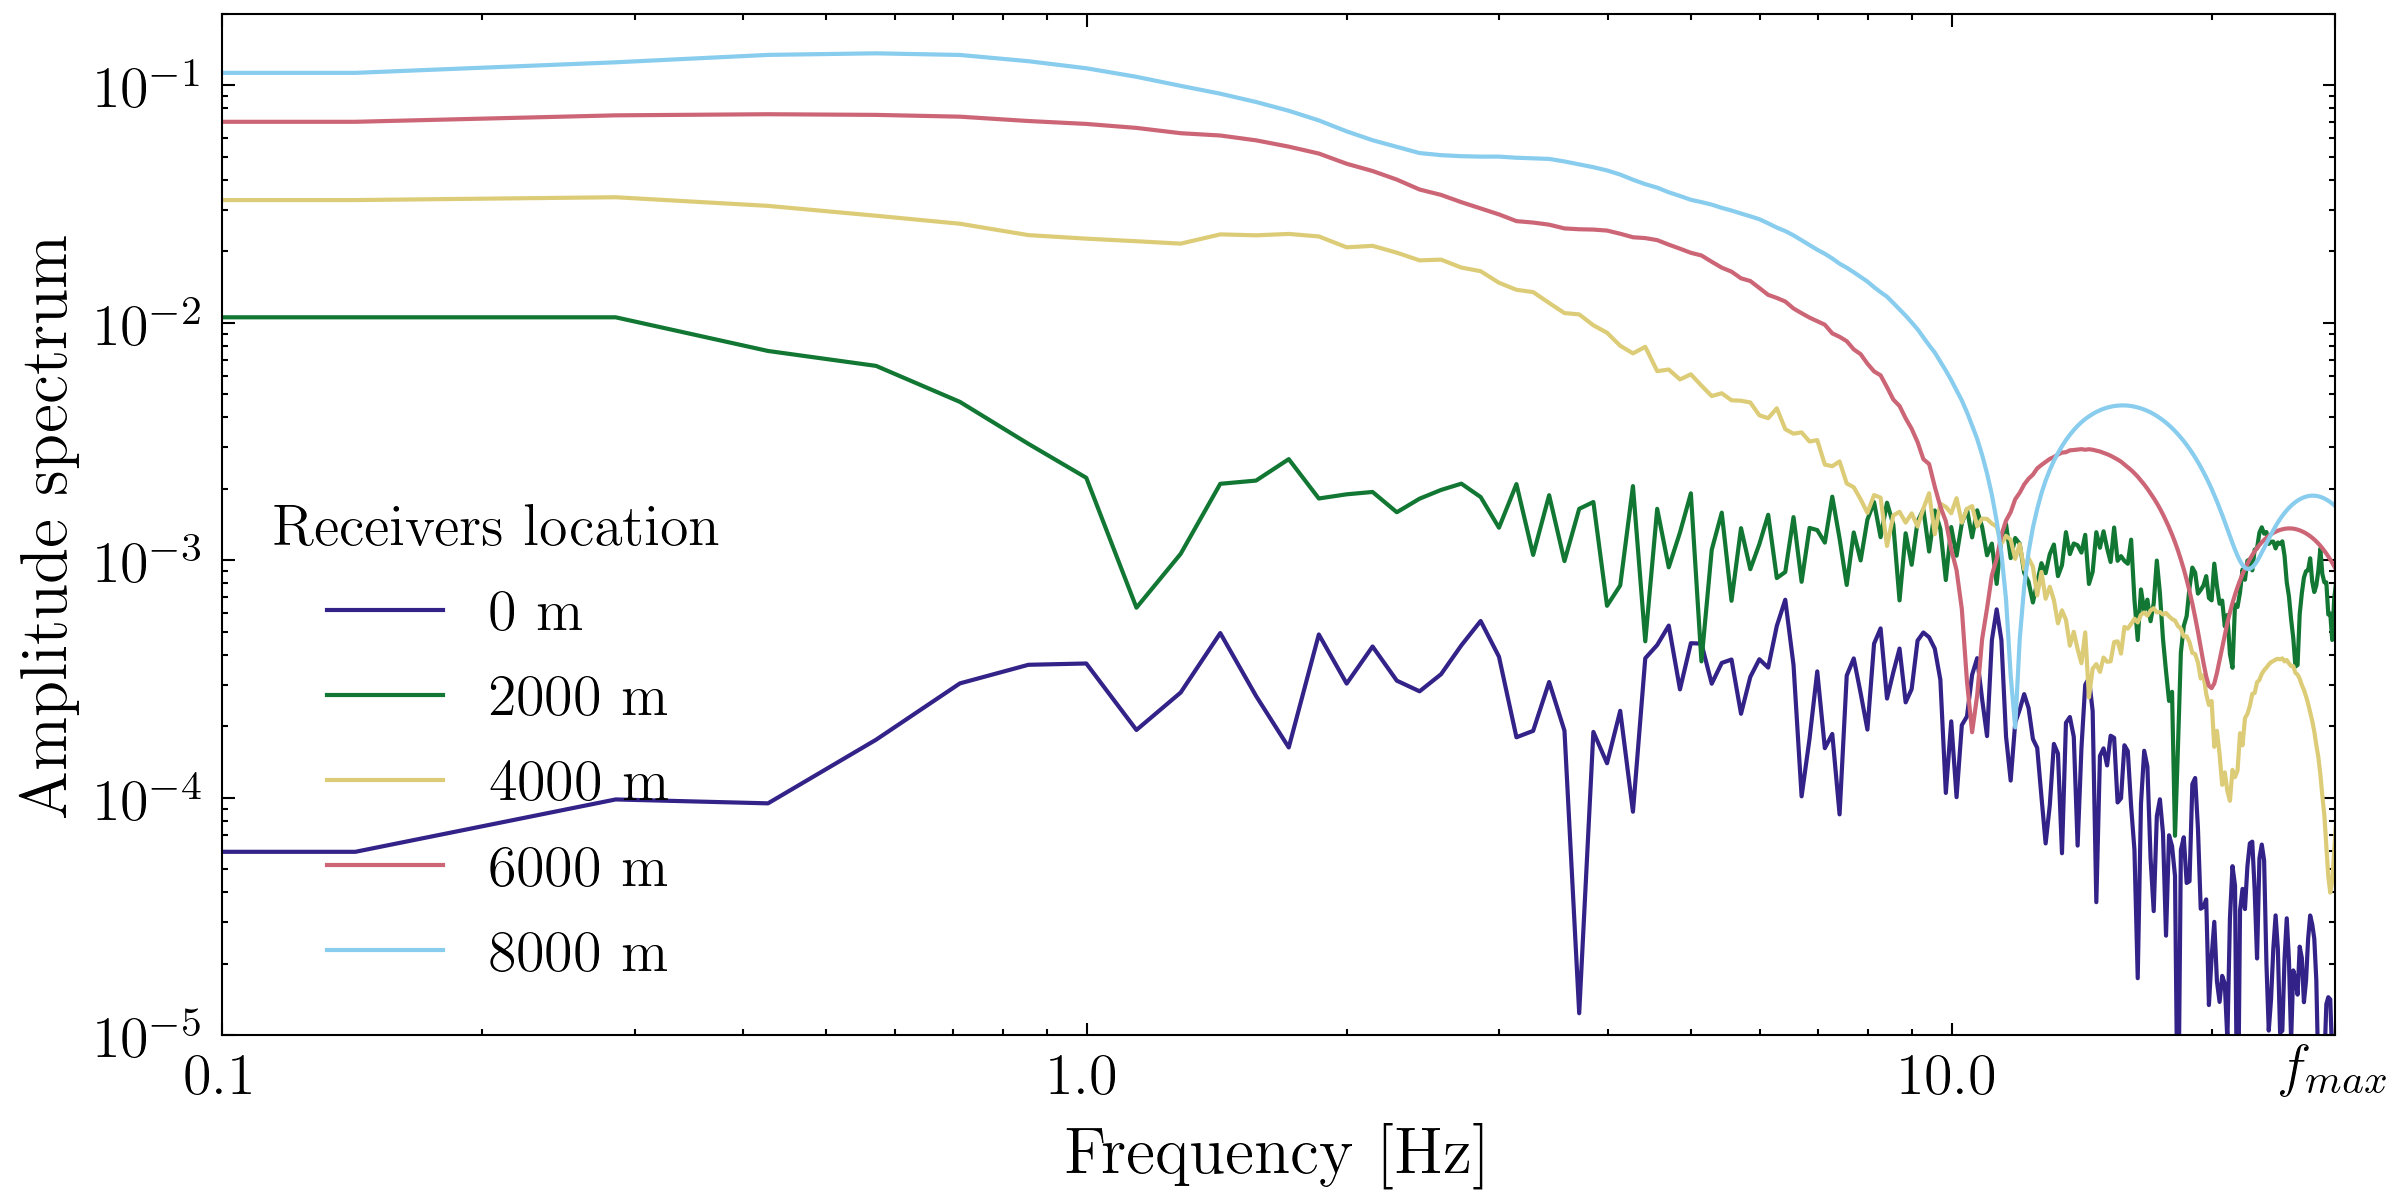

In [12]:
from palettable.cartocolors.qualitative import Safe_5_r as ElColor
cmap2 = ElColor.mpl_colors


fig = plt.figure(figsize = (8,4),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])

Xloc = [0,1,2,3,4]

spectra = []
frequency = []
for xidx in Xloc:

    ColIdx = 0
    for j in [1]: # Y location index
        ColIdx += 1
        Yloc = 5*j
        StationIDX = xidx + Yloc
        

        i = StationIDX 
        Ycoord = ListReceivers[i].Coord[1]
        Xcoord = ListReceivers[i].Coord[0]

        Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)


        print(ListReceivers[i].Coord)

        FreqSamp= 1/(Time[3]-Time[2])
        spec, freq, line = plt.magnitude_spectrum(Amplitude,FreqSamp,label='{} m'.format(Xcoord),color=cmap2[xidx])
        
        spectra.append(spec)
        frequency.append(freq)


plt.yscale("log")
plt.xscale("log")
#AddStyleLegend(ax)
Format_PlotMagnitudeSpectra(ax)
plt.ylim([1e-5,2e-1])
CustomTickX(ax,"$f_{max}$", f_se2dr)
plt.xlim([1e-1,f_se2dr])


(0.1, 27.712)

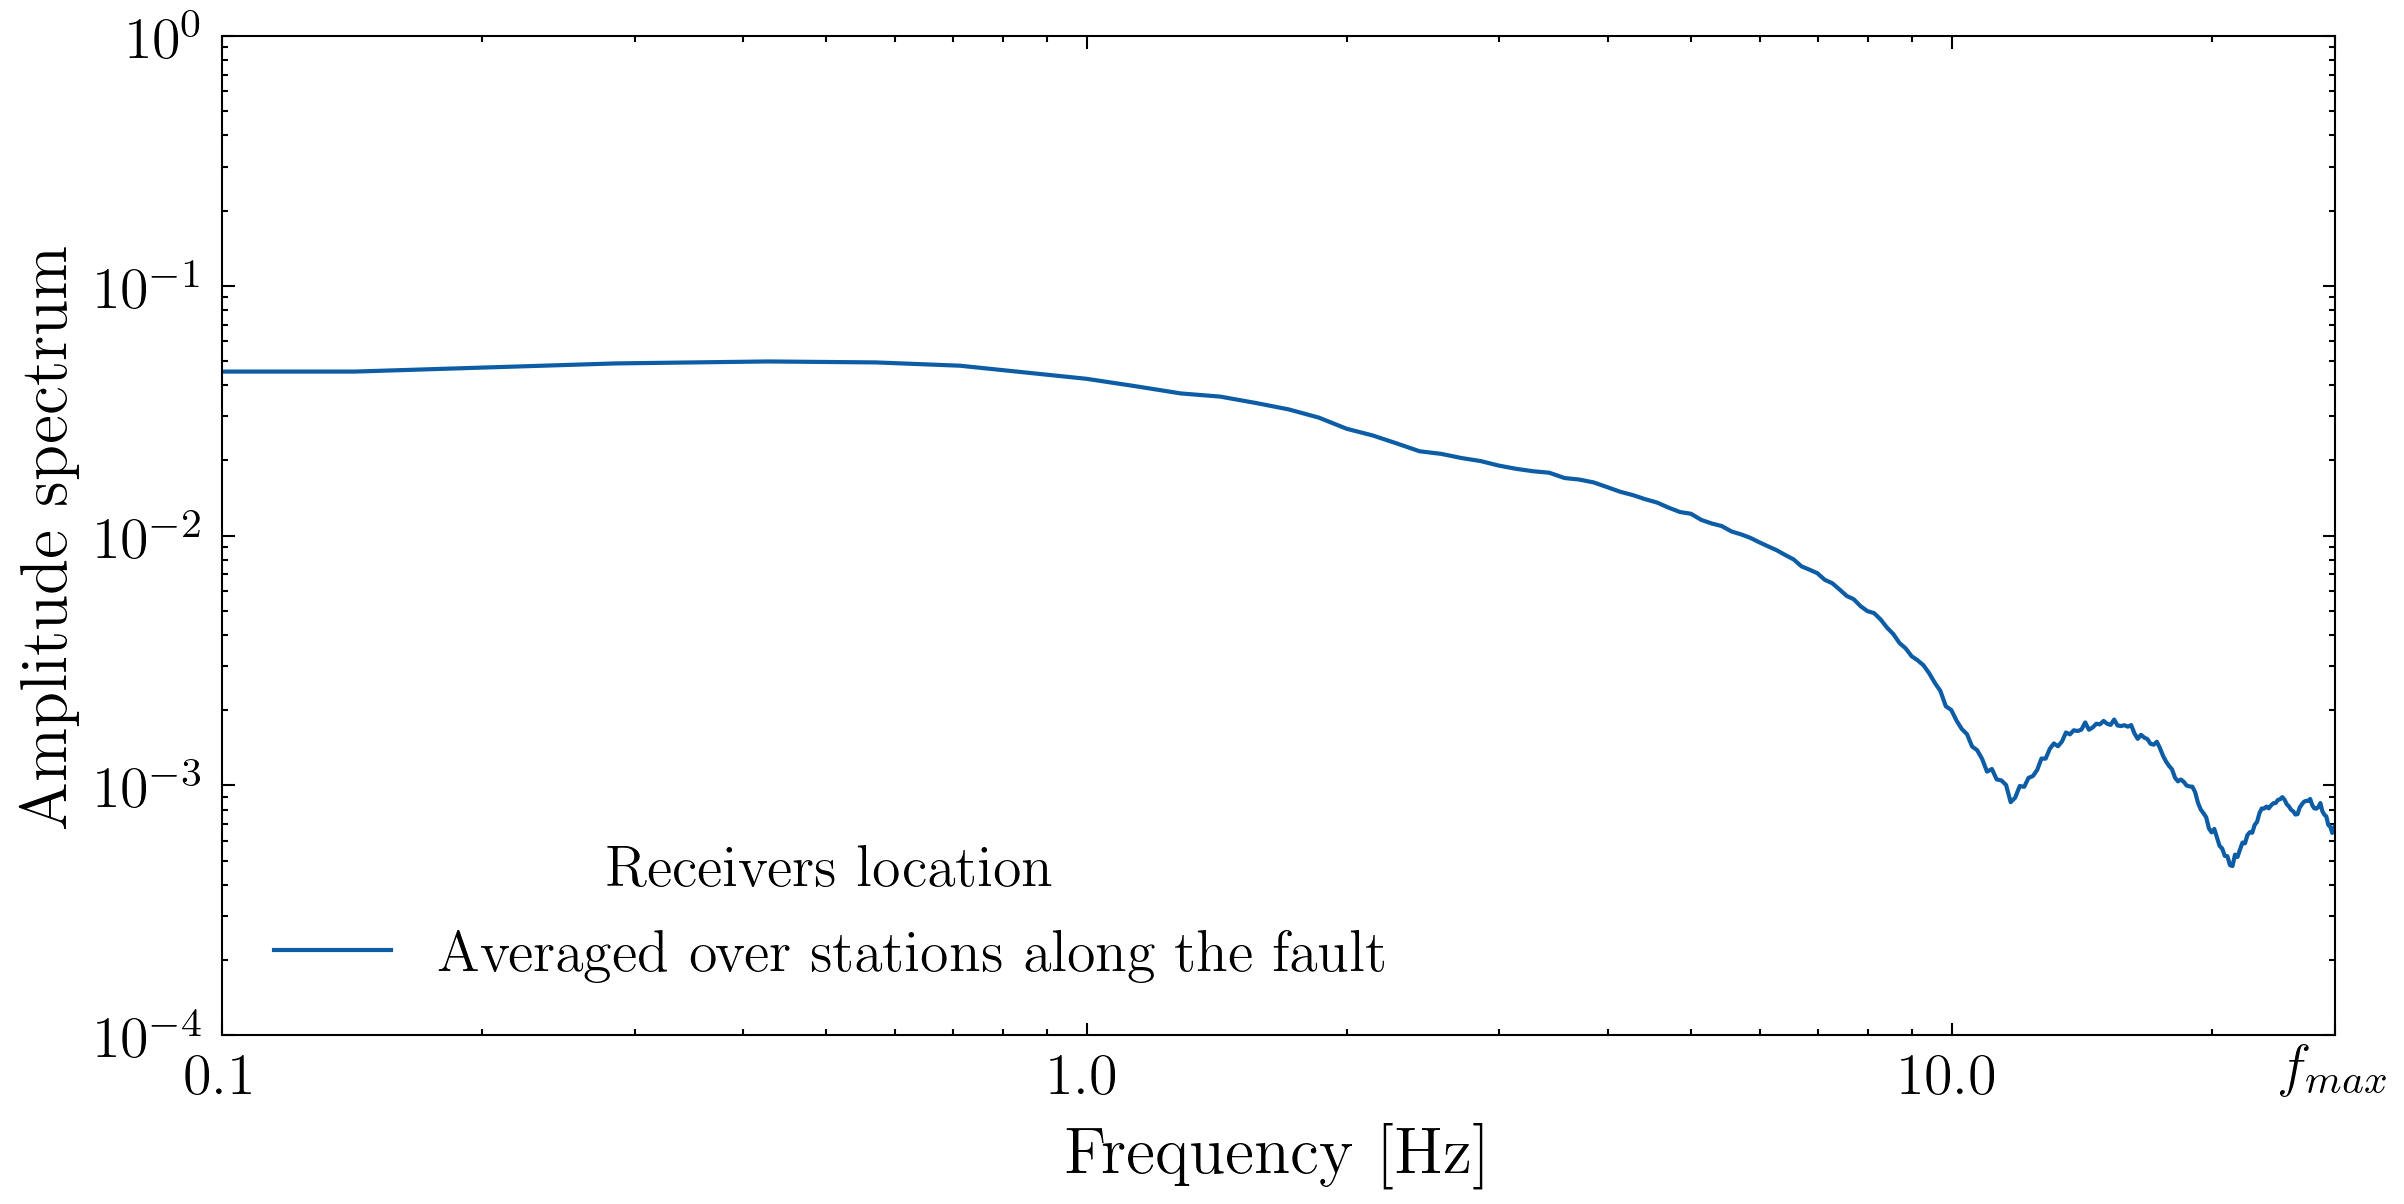

In [13]:
fig = plt.figure(figsize = (8,4),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])


MaxiSpectra = spectra[0]+spectra[1]+spectra[2]+spectra[3]+spectra[4]

AvgSpectra = MaxiSpectra/5
plt.plot(freq,AvgSpectra,label='Averaged over stations along the fault')

plt.yscale("log")
plt.xscale("log")
Format_PlotMagnitudeSpectra(ax)
plt.ylim([1e-4,1e0])
CustomTickX(ax,"$f_{max}$", f_se2dr)
plt.xlim([1e-1,f_se2dr])


(0.1, 27.712)

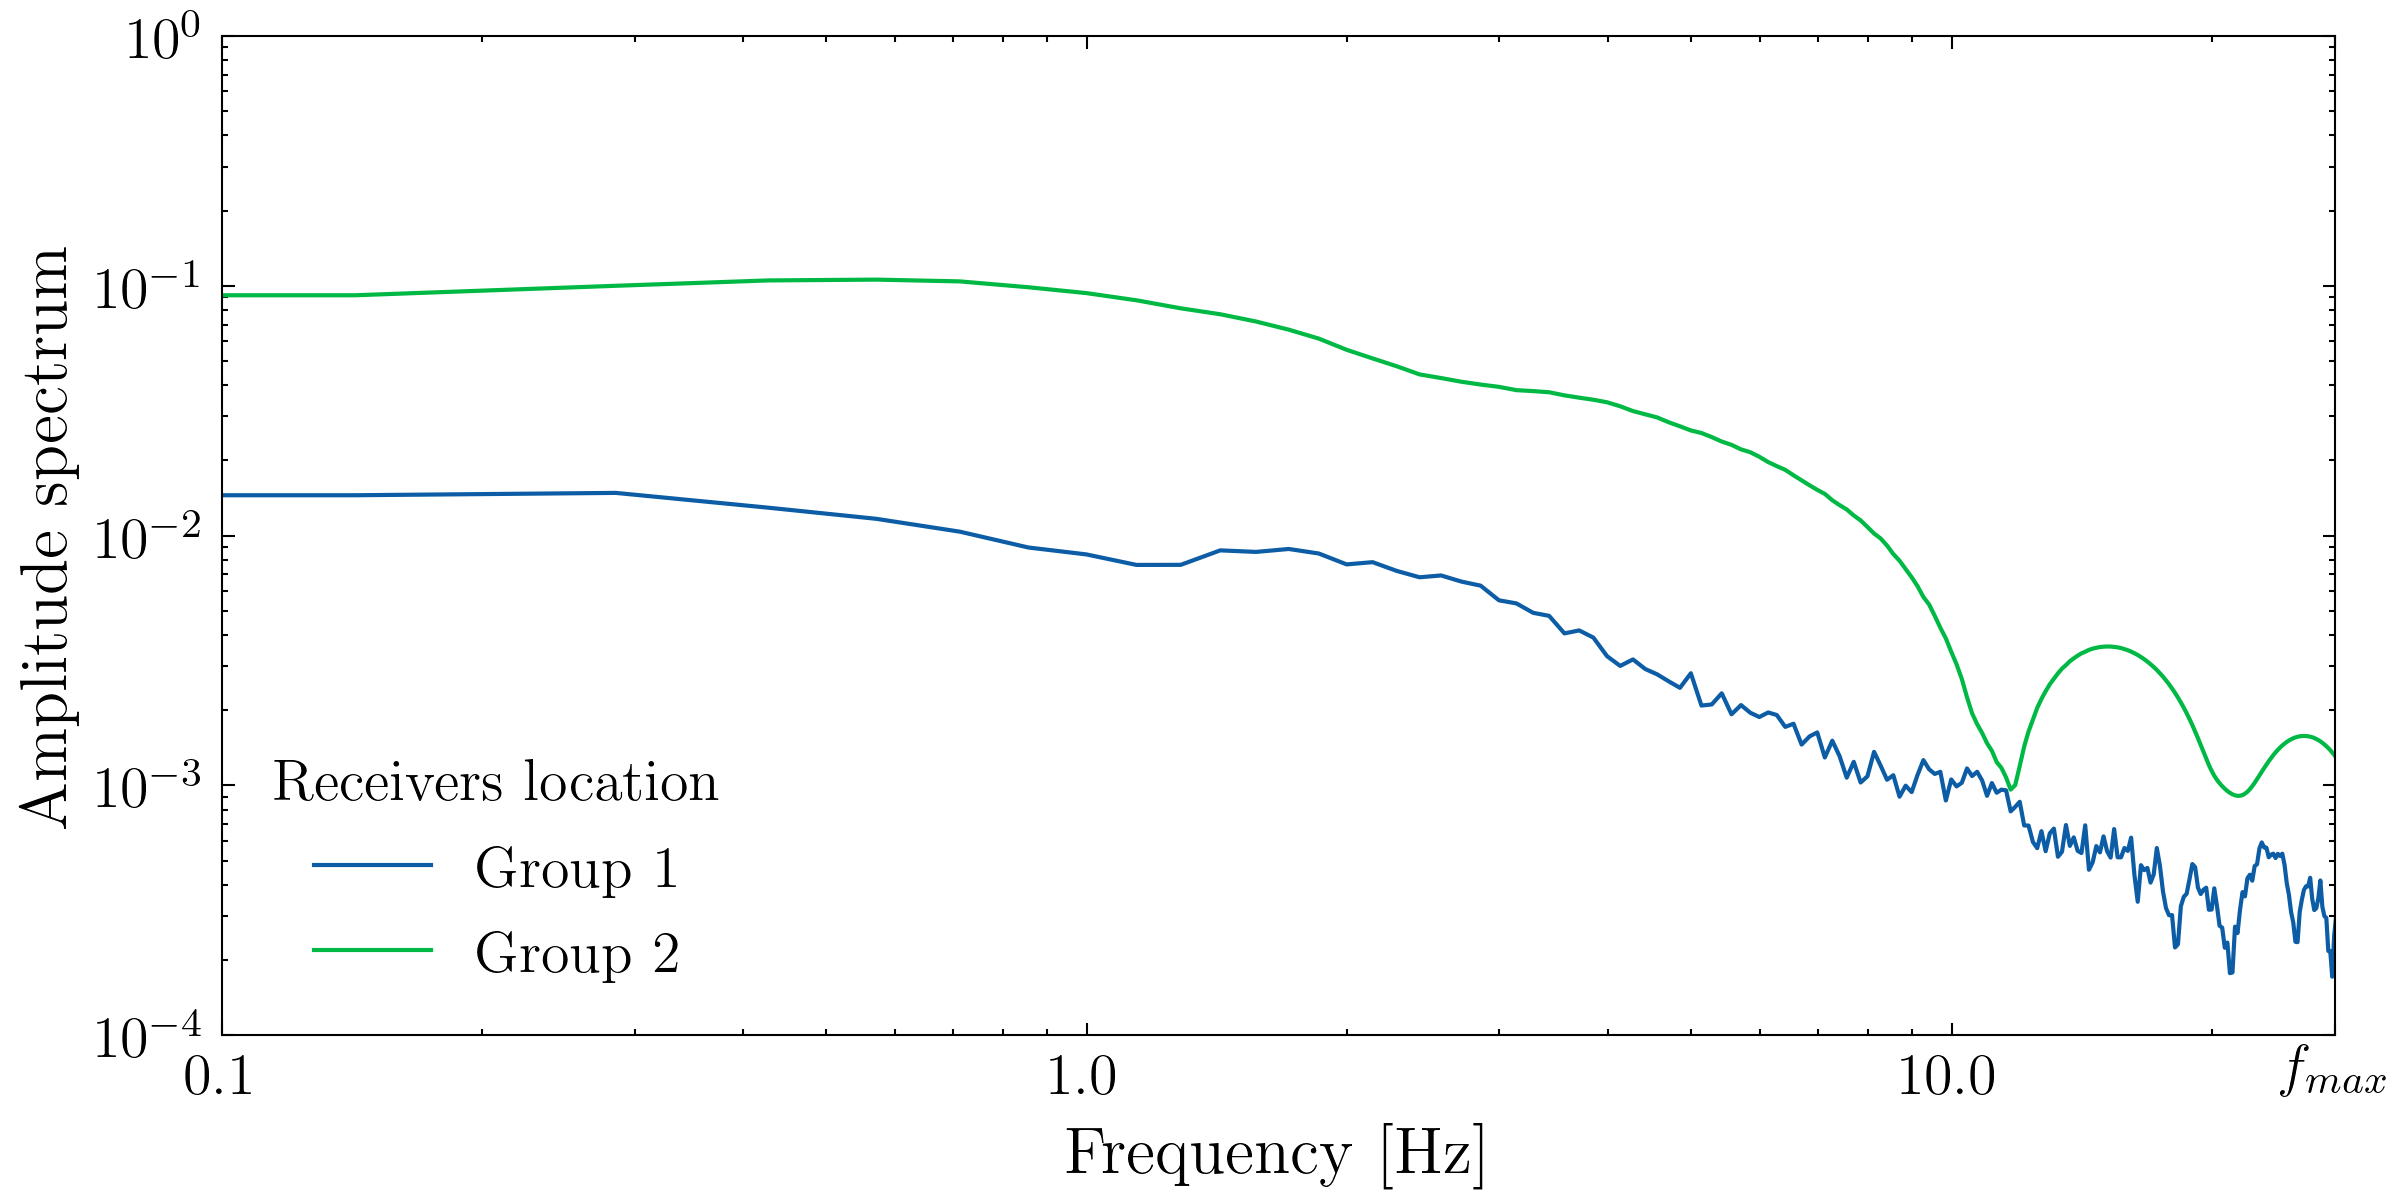

In [14]:
fig = plt.figure(figsize = (8,4),dpi=300, constrained_layout=True)
gs = fig.add_gridspec(1, 1)
ax = fig.add_subplot(gs[0, 0])


MaxiSpectra1 = (spectra[0]+spectra[1]+spectra[2])/3
MaxiSpectra2 = (spectra[3]+spectra[4])/2

plt.plot(freq,MaxiSpectra1,label='Group 1')
plt.plot(freq,MaxiSpectra2,label='Group 2')

plt.yscale("log")
plt.xscale("log")
Format_PlotMagnitudeSpectra(ax)
plt.ylim([1e-4,1e0])

CustomTickX(ax,"$f_{max}$", f_se2dr)
plt.xlim([1e-1,f_se2dr])


In [15]:


def AddGhostAxis(ax):
    # hide tick and tick label of the big axes
    ax.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax.grid(False)
    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)

def TwoColumnAxesFormat(axL,axR):
    axL.yaxis.set_major_locator(plt.MaxNLocator(2))
    axR.yaxis.set_major_locator(plt.MaxNLocator(2))
    
    axL.spines['right'].set_visible(False)
    axL.spines['top'].set_visible(False)
    axR.spines['right'].set_visible(False)
    axR.spines['top'].set_visible(False)
    
    axL.xaxis.tick_bottom()
    axL.yaxis.tick_left()
    axR.xaxis.tick_bottom()
    axR.yaxis.tick_left()

# Acceleration Information

(2000, 25.0)
(2000, 500.0)
[2000, 25]
[2000, 500]


(1e-05, 0.1)

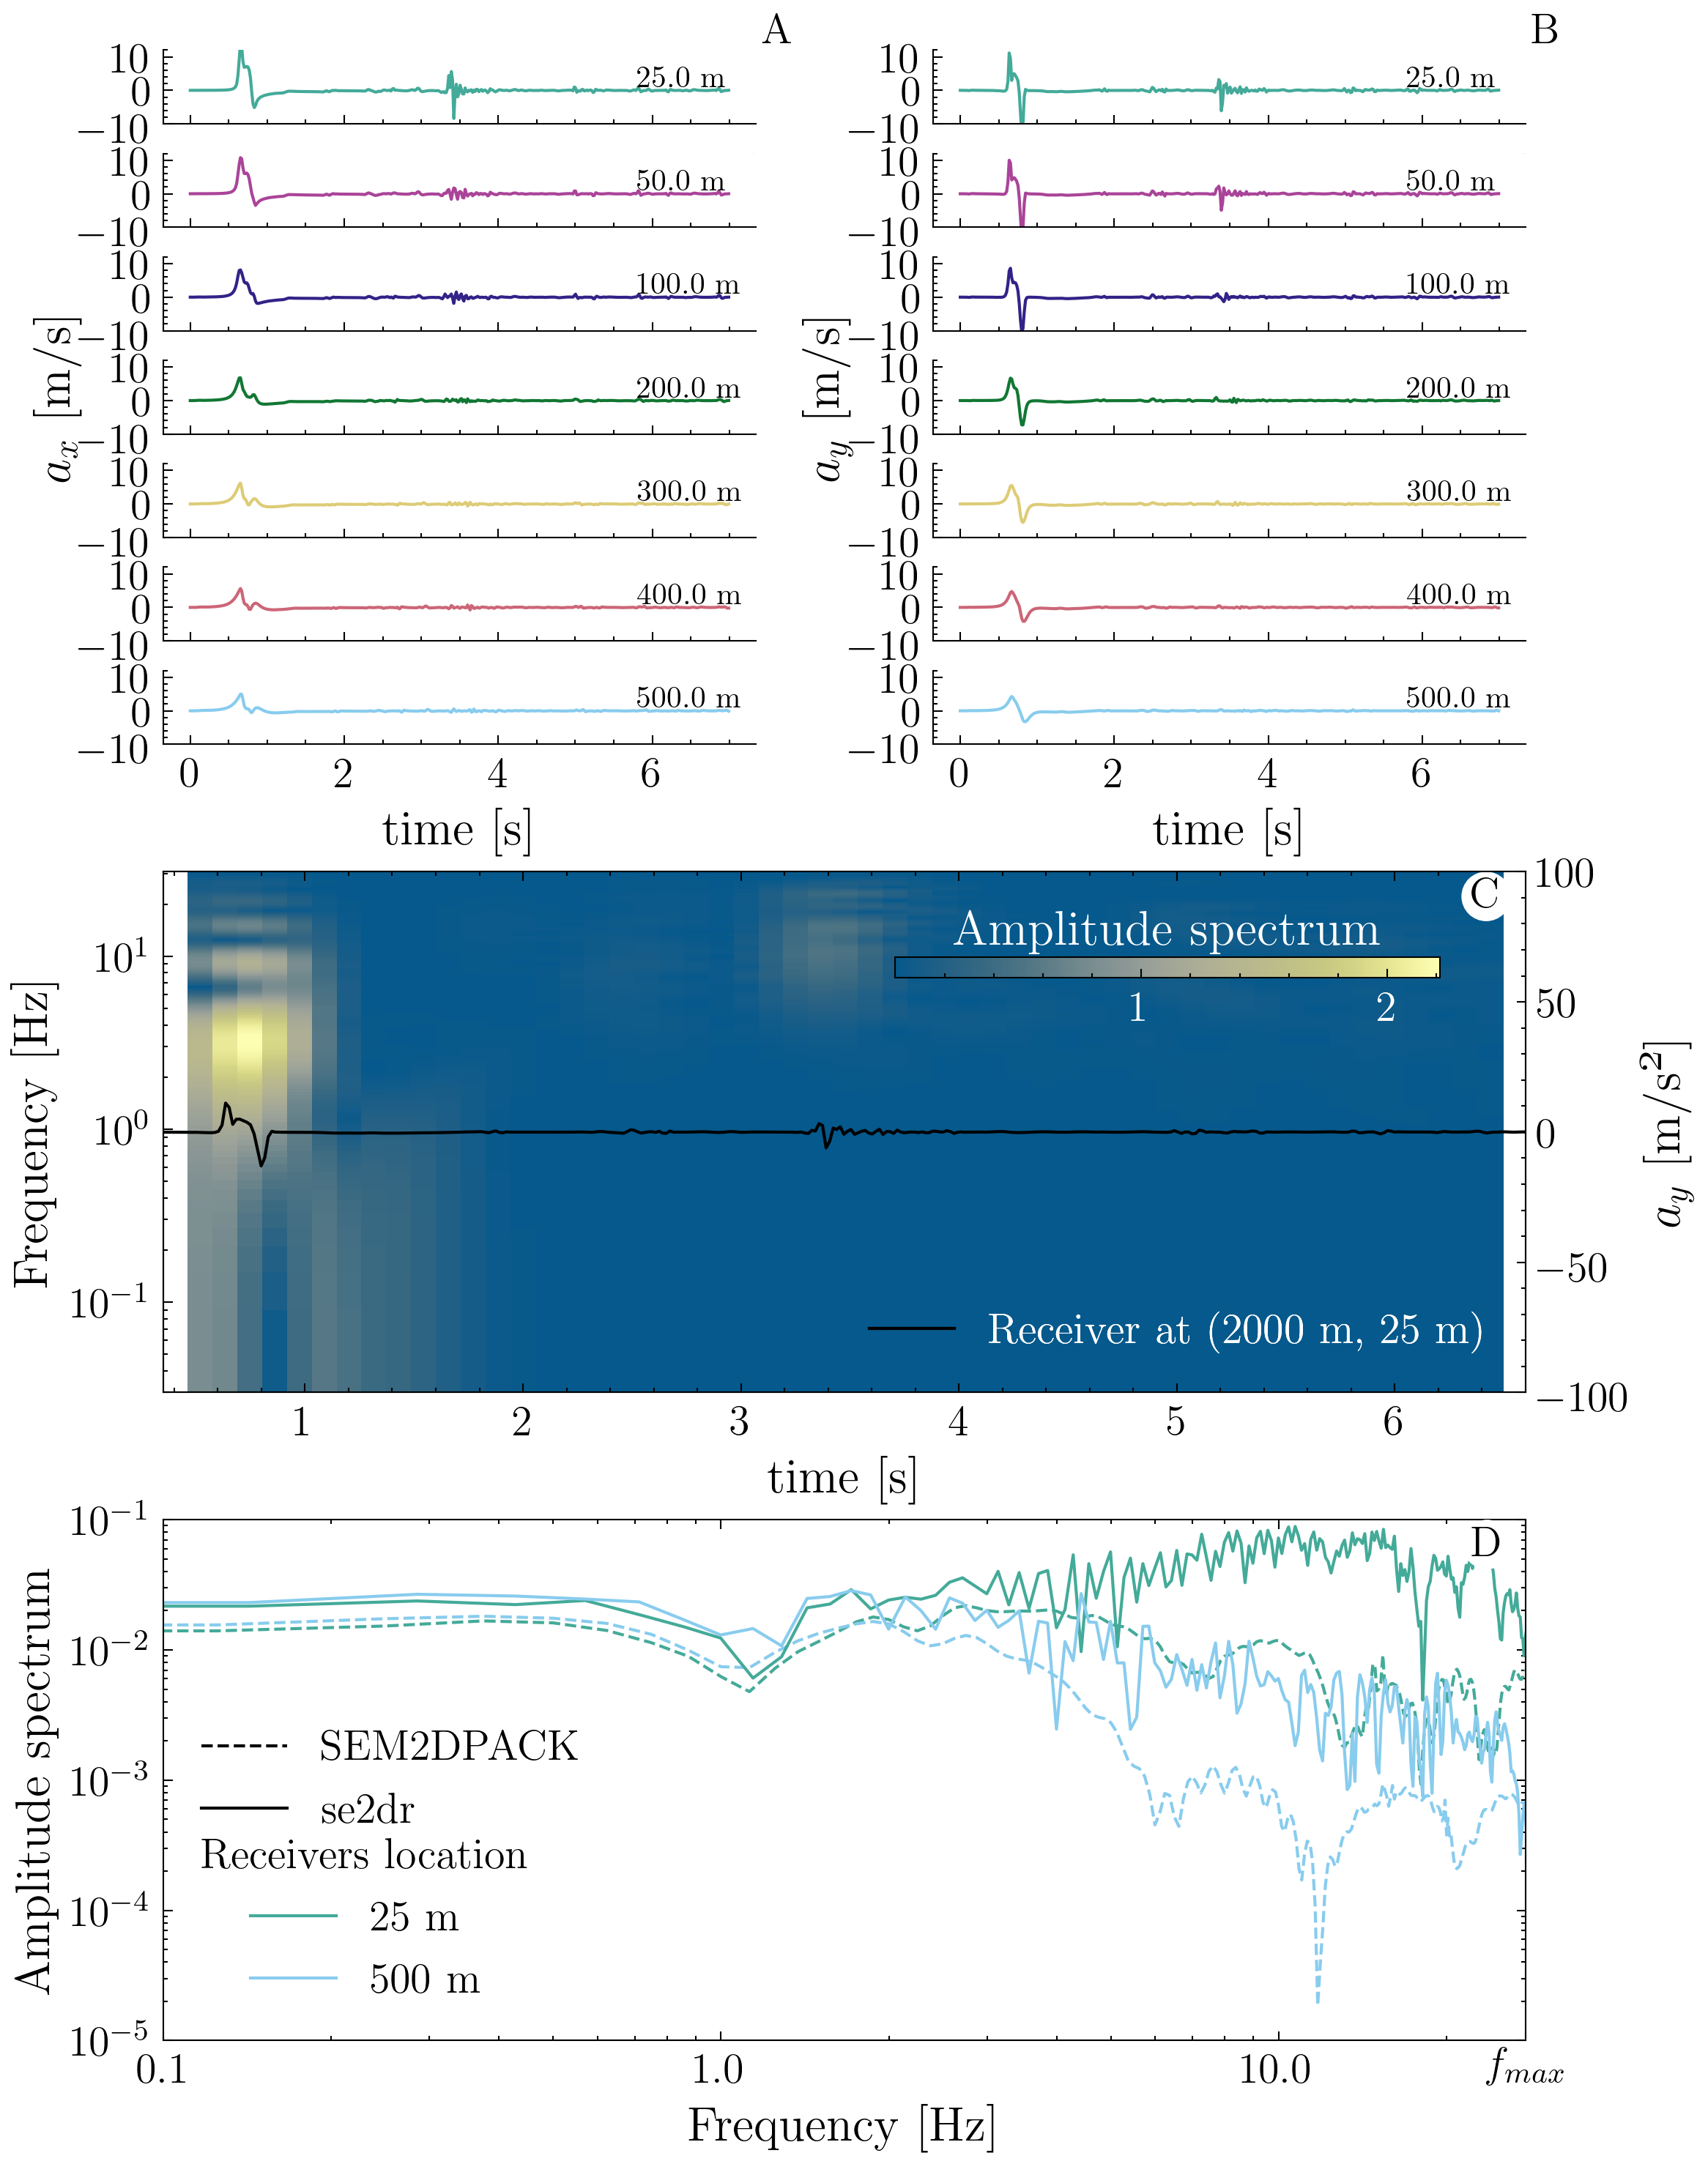

In [21]:


fig = plt.figure(figsize = (8, 12),dpi=300)
gs = fig.add_gridspec(3, 1, hspace=0.22,height_ratios=[0.4,0.3,0.3])

gsSet = gs[0].subgridspec(7, 2, wspace=0.3, hspace=0.4)
axSpec = fig.add_subplot(gs[1])
axMagSpec = fig.add_subplot(gs[2])


Xloc = 1 # X location index

################# Acceleration profiles
GaxL = fig.add_subplot(gsSet[:,0])
GaxR = fig.add_subplot(gsSet[:,1])

AddGhostAxis(GaxL)
AddGhostAxis(GaxR)

GaxL.set_ylabel("$a_x$ [m/s]")
GaxR.set_ylabel("$a_y$ [m/s]")
GaxL.set_xlabel("time [s]")
GaxR.set_xlabel("time [s]")

for j in range(1,8):
    axL = fig.add_subplot(gsSet[j-1,0])
    axR = fig.add_subplot(gsSet[j-1,1])
    plt.setp(axL.get_xticklabels(), visible=False)
    plt.setp(axR.get_xticklabels(), visible=False)
    
    axL.set_ylim([-10,12])
    axR.set_ylim([-10,12])
    axL.locator_params(axis="y", nbins=2)
    axR.locator_params(axis="y", nbins=2)
    
    Yloc = 5*j
    StationIDX = Xloc + Yloc
    
    Xcoord = float(ListReceivers[StationIDX].Coord[0])
    Ycoord = float(ListReceivers[StationIDX].Coord[1])

    Time, Amplitude = SortReceiver(ListReceivers[StationIDX],ListReceivers[StationIDX].VelX)
    Amplitude = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))
    axL.plot(Time, Amplitude, color=cmap[j])
    
    Time, Amplitude = SortReceiver(ListReceivers[StationIDX],ListReceivers[StationIDX].VelY)
    Amplitude = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))
    axR.plot(Time, Amplitude, color=cmap[j])
    
    axL.text(0.8, .5, "{} m".format(Ycoord), transform=axL.transAxes,fontsize=10)
    axR.text(0.8, .5, "{} m".format(Ycoord), transform=axR.transAxes,fontsize=10)
    
    TwoColumnAxesFormat(axL,axR)

plt.setp(axL.get_xticklabels(), visible=True)
plt.setp(axR.get_xticklabels(), visible=True)

################################################

################# Spectrogram

StationIDX = Xloc + 5*1
axSpec,axSpec2 = Receiver2GradientSpectrogram(ListReceivers[StationIDX], ListReceivers[StationIDX].VelY, 
                                              yLabel="$a_y$ [m/s²]", 
                                              wlen = 40, mult=20, cmap=cmapCont, **{"ax": axSpec})

axSpec.set_xlim([0.35,6.6])
axSpec2.set_ylim([-1e2,1e2])

GetLineReceiver2Legend(axSpec2,ListReceivers,StationIDX,"w")
################ Magnitude spectra

PlotReference(ListReferenceReceivers,axMagSpec)
for j in [1,7]: # Y location index

    Yloc = 5*j
    i = Xloc + Yloc

    Ycoord = ListReceivers[i].Coord[1]
    Xcoord = ListReceivers[i].Coord[0]

    Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)
    AmplitudeGrad = np.asarray(pd.Series(np.gradient(Amplitude, Time).tolist()))


    print(ListReceivers[i].Coord)

    FreqSamp= 1/(Time[3]-Time[2])
    axMagSpec.magnitude_spectrum(AmplitudeGrad,FreqSamp,label='{} m'.format(Ycoord),color=cmap[j])
    
    
AddStyleLegend(axMagSpec)
Format_PlotMagnitudeSpectra(axMagSpec)

AxisList=[GaxL,GaxR]
LabelizeAxisList(AxisList,Pos=[1.01, 1.01],bbox=dict(boxstyle="circle,pad=0.1",facecolor='white',ec="b", lw=0))
AxisList=[axSpec,axMagSpec]
LabelizeAxisList(AxisList,Pos=[0.96, 0.93], OffsetLabel=2,
                 bbox=dict(boxstyle="circle,pad=0.1",facecolor='white',ec="b", lw=0))

CustomTickX(axMagSpec,"$f_{max}$", f_se2dr)


axMagSpec.set_xlim([1e-1,f_se2dr])
axMagSpec.set_ylim([1e-5,1e-1])

# Velocity Information

(2000, 25.0)
(2000, 500.0)


(1e-05, 0.02)

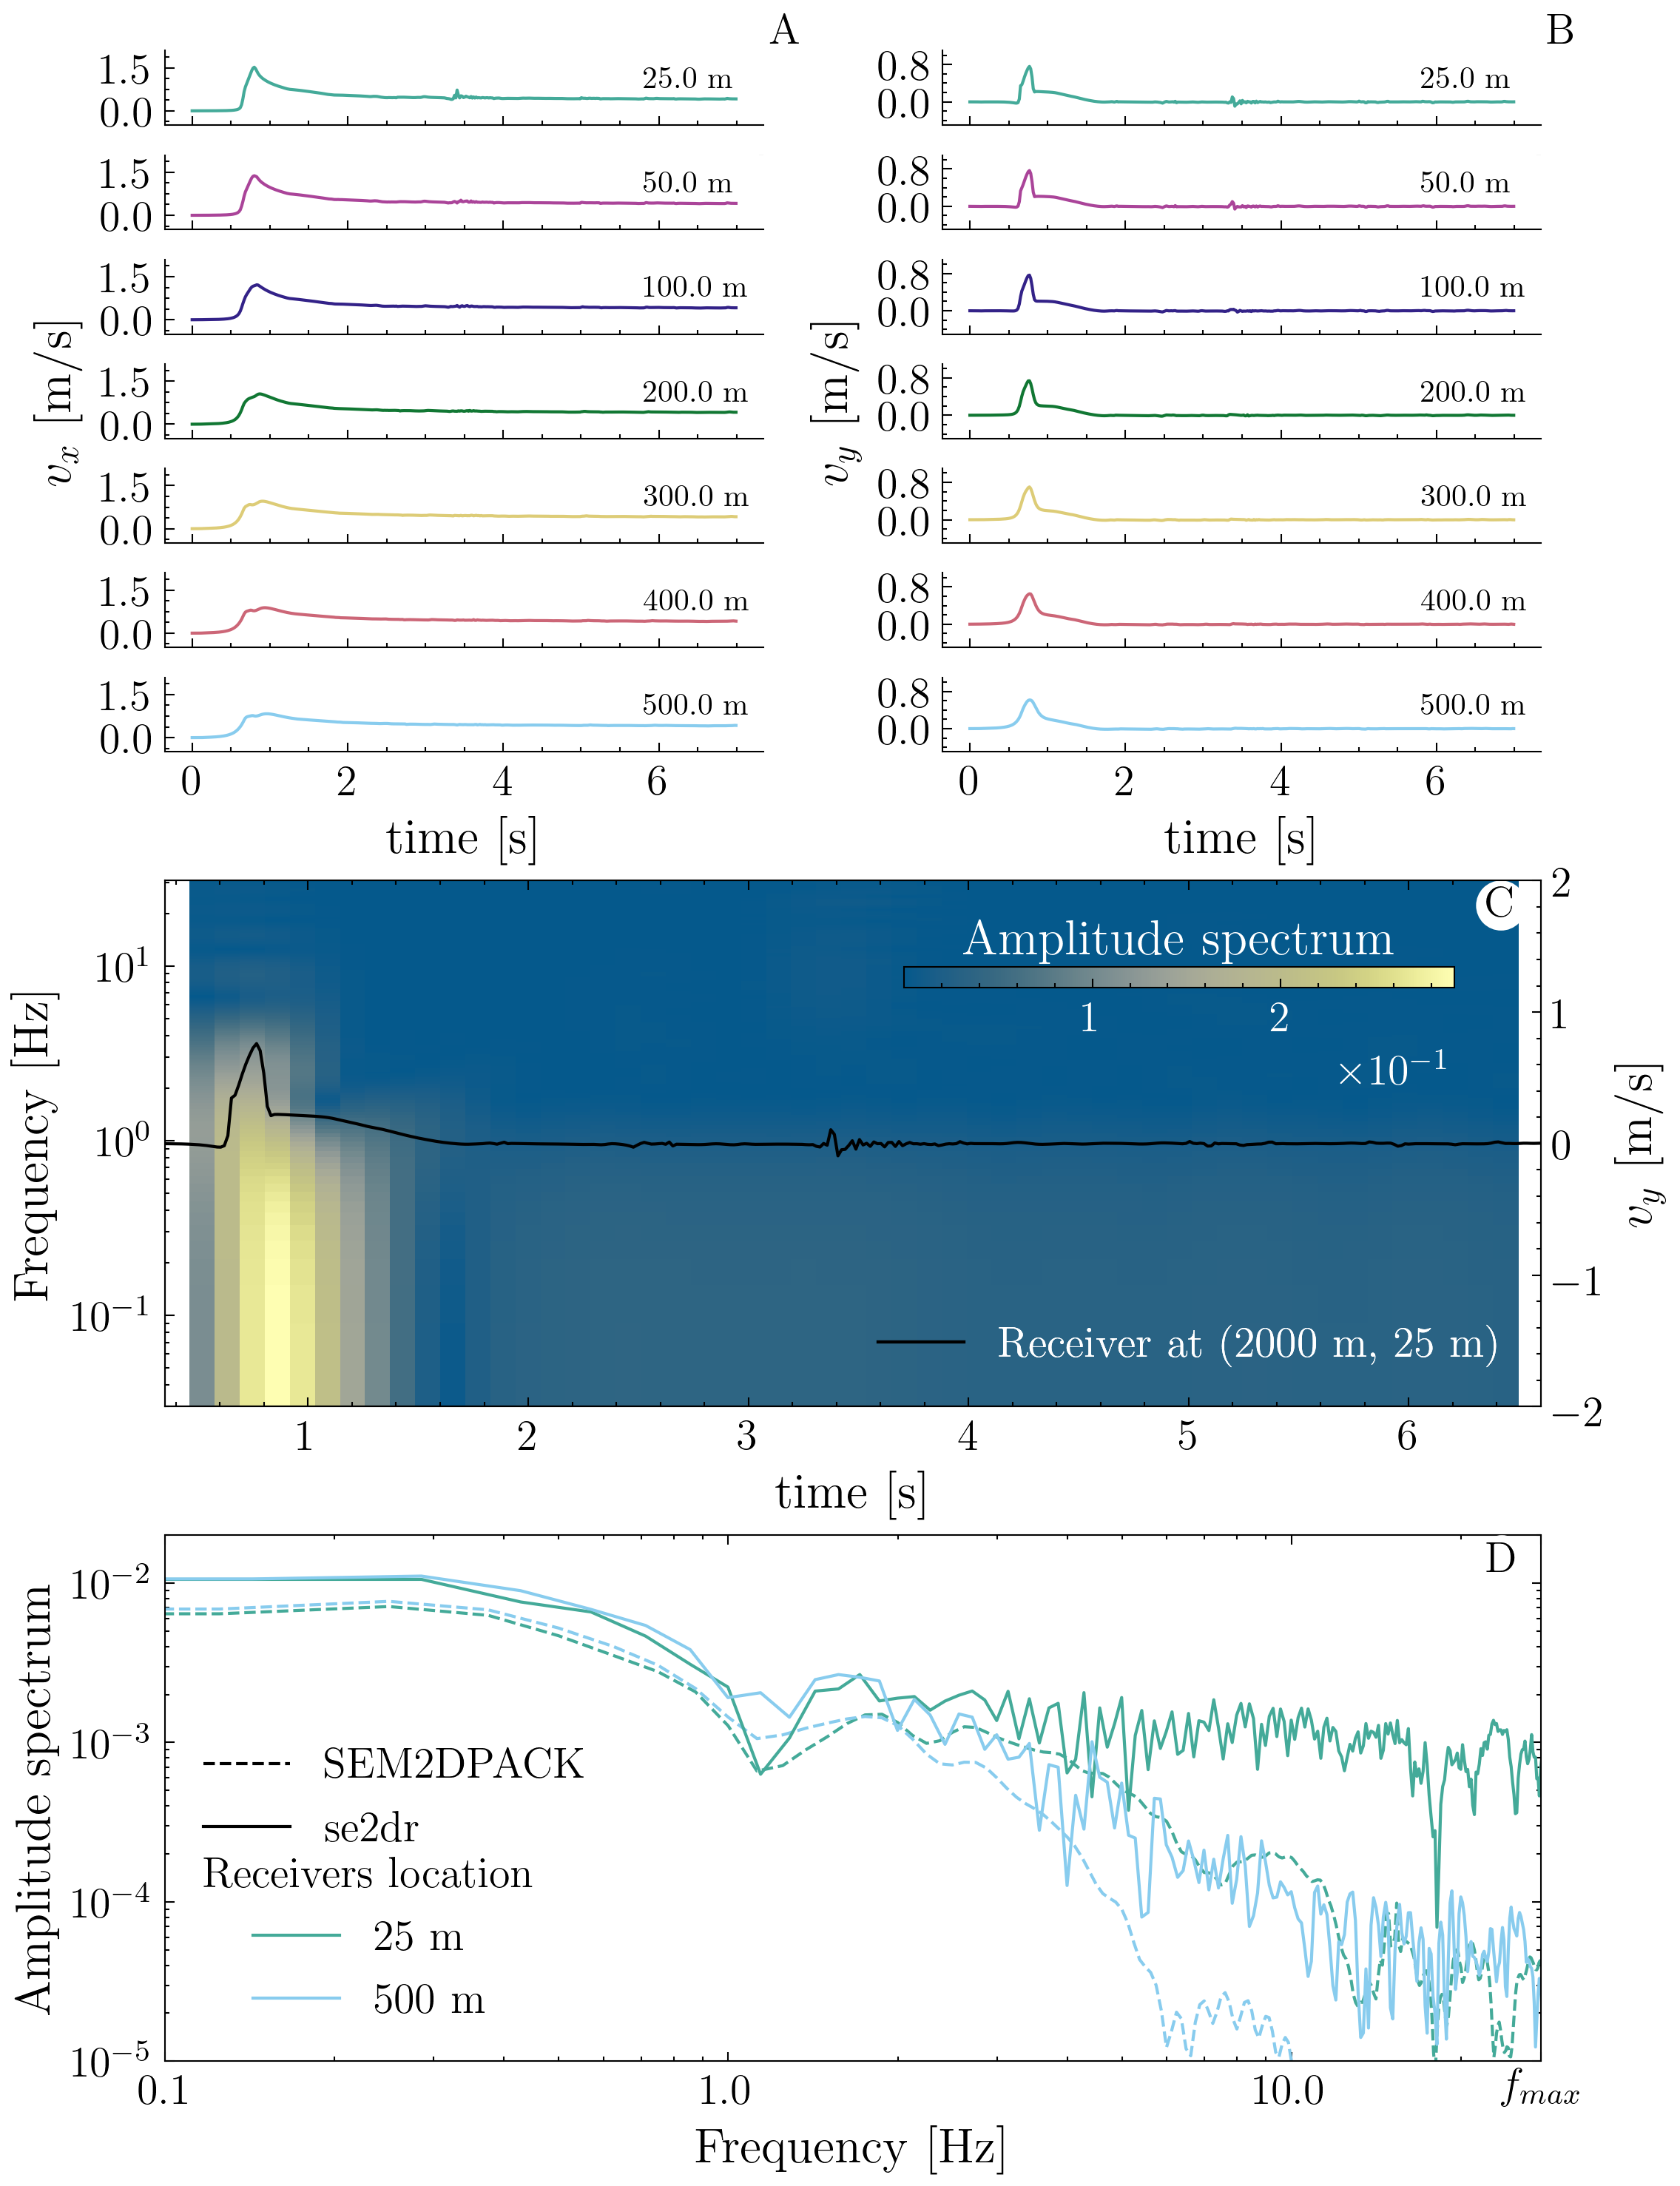

In [17]:

fig = plt.figure(figsize = (8, 12),dpi=300)
gs = fig.add_gridspec(3, 1, hspace=0.22,height_ratios=[0.4,0.3,0.3])

gsSet = gs[0].subgridspec(7, 2, wspace=0.3, hspace=0.4)
axSpec = fig.add_subplot(gs[1])
axMagSpec = fig.add_subplot(gs[2])


Xloc = 1 # X location index

################# Acceleration profiles
GaxL = fig.add_subplot(gsSet[:,0])
GaxR = fig.add_subplot(gsSet[:,1])

AddGhostAxis(GaxL)
AddGhostAxis(GaxR)

GaxL.set_ylabel("$v_x$ [m/s]")
GaxR.set_ylabel("$v_y$ [m/s]")
GaxL.set_xlabel("time [s]")
GaxR.set_xlabel("time [s]")

for j in range(1,8):
    axL = fig.add_subplot(gsSet[j-1,0])
    axR = fig.add_subplot(gsSet[j-1,1])
    plt.setp(axL.get_xticklabels(), visible=False)
    plt.setp(axR.get_xticklabels(), visible=False)
    
    axL.set_ylim([-.5,2.1])
    axR.set_ylim([-.5,1.1])
    
    Yloc = 5*j
    StationIDX = Xloc + Yloc
    
    Xcoord = float(ListReceivers[StationIDX].Coord[0])
    Ycoord = float(ListReceivers[StationIDX].Coord[1])

    Time, Amplitude = SortReceiver(ListReceivers[StationIDX],ListReceivers[StationIDX].VelX)
    axL.plot(Time, Amplitude, color=cmap[j])
    
    Time, Amplitude = SortReceiver(ListReceivers[StationIDX],ListReceivers[StationIDX].VelY)
    axR.plot(Time, Amplitude, color=cmap[j])
    
    axL.text(0.8, .5, "{} m".format(Ycoord), transform=axL.transAxes,fontsize=10)
    axR.text(0.8, .5, "{} m".format(Ycoord), transform=axR.transAxes,fontsize=10)
    
    TwoColumnAxesFormat(axL,axR)
    

plt.setp(axL.get_xticklabels(), visible=True)
plt.setp(axR.get_xticklabels(), visible=True)


################# Spectrogram

StationIDX = Xloc + 5*1
axSpec,axSpec2 = Receiver2Spectrogram(ListReceivers[StationIDX], ListReceivers[StationIDX].VelY, 
                                      yLabel="$v_y$ [m/s]", 
                                      wlen = 40, mult=20, cmap=cmapCont, **{"ax": axSpec})

axSpec.set_xlim([0.35,6.6])
axSpec2.set_ylim([-0.2e1,0.2e1])

GetLineReceiver2Legend(axSpec2,ListReceivers,StationIDX,"w")
################ Magnitude spectra

PlotReference(ListReferenceReceivers,axMagSpec,Gradient=False)
for j in [1,7]: # Y location index
    Yloc = 5*j
    i = Xloc + Yloc

    Ycoord = ListReceivers[i].Coord[1]
    Xcoord = ListReceivers[i].Coord[0]

    Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)

    FreqSamp= 1/(Time[3]-Time[2])
    axMagSpec.magnitude_spectrum(Amplitude,FreqSamp,label='{} m'.format(Ycoord),color=cmap[j])
    


AddStyleLegend(axMagSpec)
Format_PlotMagnitudeSpectra(axMagSpec)

#### Labels on corner
AxisList=[GaxL,GaxR]
LabelizeAxisList(AxisList,Pos=[1.01, 1.01],bbox=dict(boxstyle="circle,pad=0.1",facecolor='white',ec="b", lw=0))
AxisList=[axSpec,axMagSpec]
LabelizeAxisList(AxisList,Pos=[0.96, 0.93], OffsetLabel=2,
                 bbox=dict(boxstyle="circle,pad=0.1",facecolor='white',ec="b", lw=0))


CustomTickX(axMagSpec,"$f_{max}$", f_se2dr)

axMagSpec.set_xlim([1e-1,f_se2dr])
axMagSpec.set_ylim([1e-5,2e-2])

(2000, 25.0)
(2000, 500.0)


(0.1, 27.712)

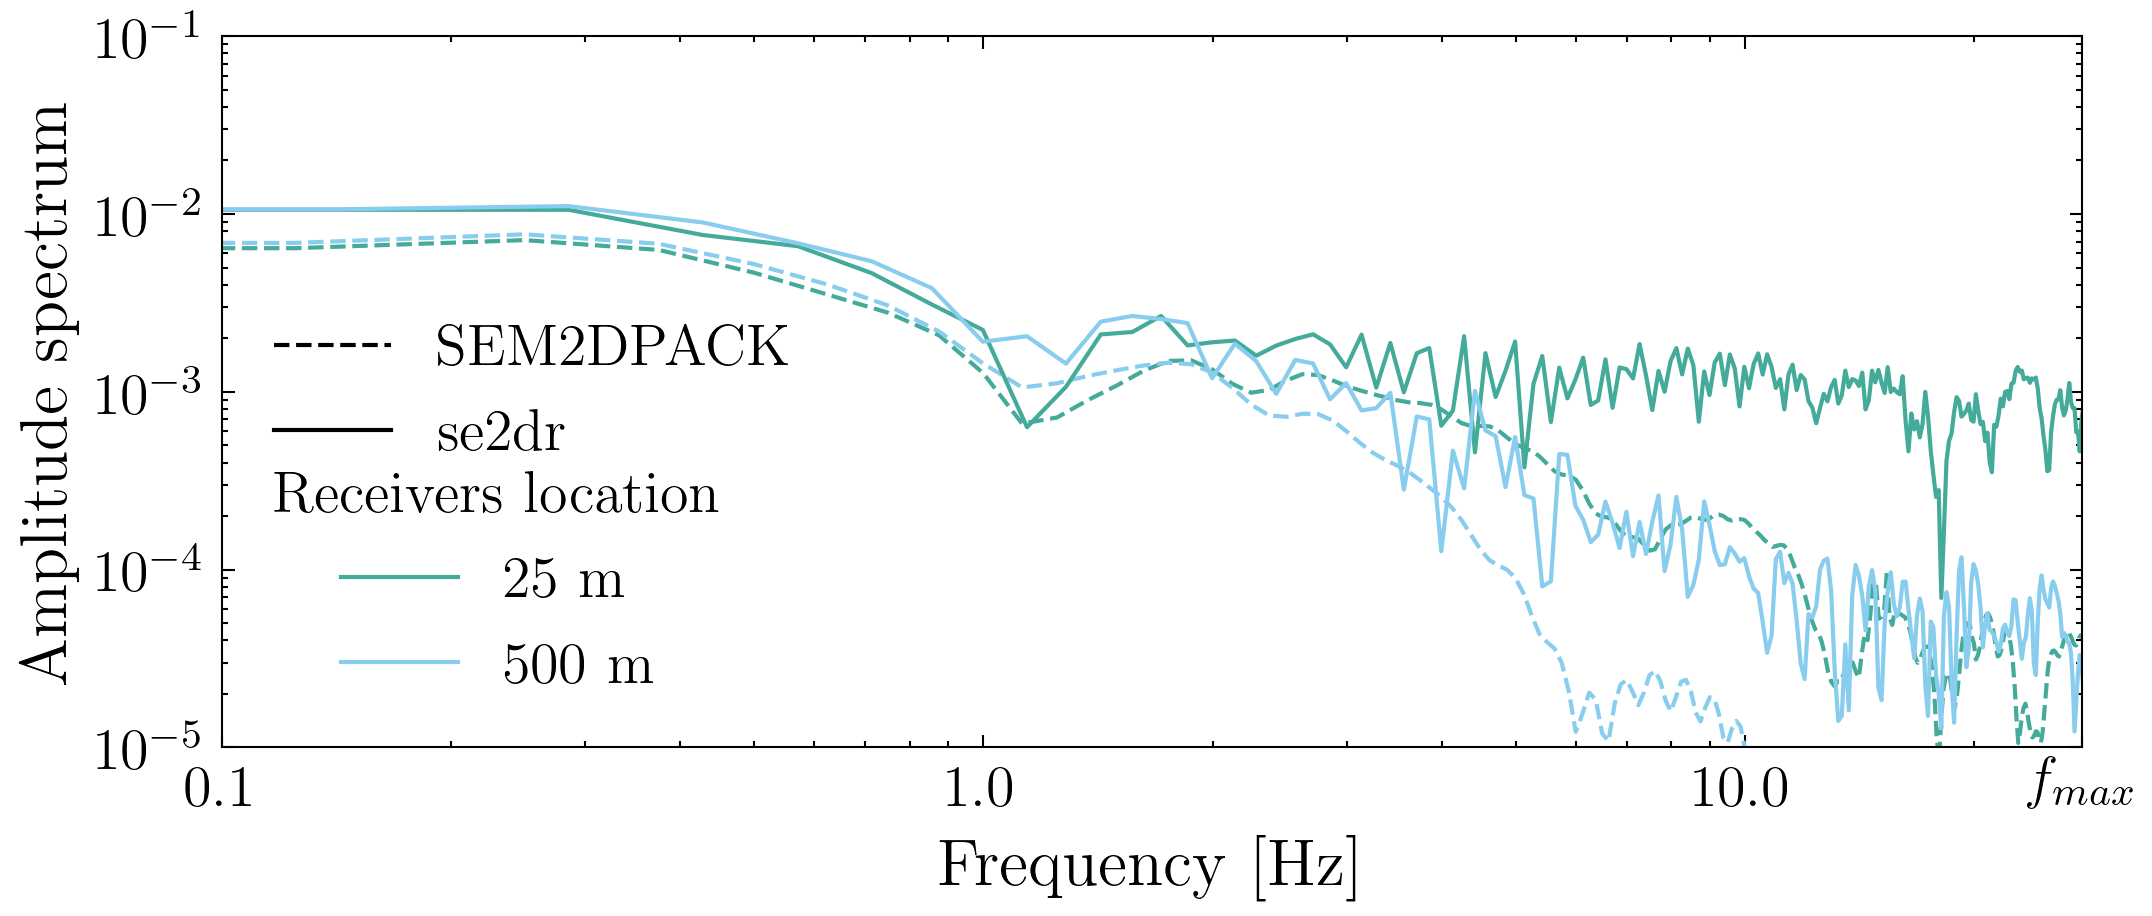

In [18]:
fig = plt.figure(figsize = (8, 12),dpi=300)
gs = fig.add_gridspec(3, 1, hspace=0.22,height_ratios=[0.4,0.3,0.3])

axMagSpec = fig.add_subplot(gs[2])

PlotReference(ListReferenceReceivers,axMagSpec,Gradient=False)
for j in [1,7]: # Y location index
    Yloc = 5*j
    i = Xloc + Yloc

    Ycoord = ListReceivers[i].Coord[1]
    Xcoord = ListReceivers[i].Coord[0]

    Time, Amplitude = SortReceiver(ListReceivers[i],ListReceivers[i].VelY)

    FreqSamp= 1/(Time[3]-Time[2])
    Amp,Freq,line = axMagSpec.magnitude_spectrum(Amplitude,FreqSamp,label='{} m'.format(Ycoord),color=cmap[j])
    
axMagSpec.set_xlim([1e-1,f_se2dr])

AddStyleLegend(axMagSpec)
Format_PlotMagnitudeSpectra(axMagSpec)

######################### Line for fallout frequency
CustomTickX(axMagSpec,"$f_{max}$", f_se2dr)

axMagSpec.set_xlim([1e-1,f_se2dr])

In [19]:
Masking = np.ma.masked_inside(Freq,0.5,5)
print(Amp[Masking.mask],np.mean(Amp[Masking.mask]))

[0.00684627 0.00542526 0.00382707 0.00191232 0.0020528  0.00144029
 0.0024807  0.002669   0.00256497 0.00243314 0.00119125 0.00186449
 0.00148701 0.00097401 0.00151048 0.00144306 0.00090621 0.00111924
 0.00078553 0.00080886 0.00098663 0.00028146 0.00072596 0.00069977
 0.00012667 0.0004665  0.00028602 0.00101121 0.00060538 0.00056329
 0.00029095 0.0005564 ] 0.0015731942848469013
